In [290]:
### The required libraries and packages ###
import sys
import os 
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nxviz as nv
from nxviz import annotate, highlights
# from matplotlib import cm
from nxviz.plots import CircosPlot

ImportError: cannot import name 'CircosPlot' from 'nxviz.plots' (/home/bijanadmin/anaconda3/lib/python3.8/site-packages/nxviz/plots.py)

In [279]:
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [10]:
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

In [11]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions) # convert to array for clarity
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = int(float(interaction[2])*100) # score as weighted edge
    
    # To include all the weighted connections, uncomment the following line
    # G.add_weighted_edges_from([(a,b,w)])
    
    # To only keep high scoring edges, use the following lines
    if w > 80: # only keep high scoring edges
        G.add_weighted_edges_from([(a,b,w)])

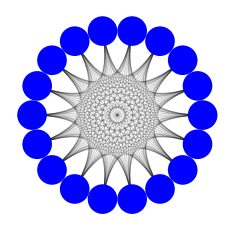

In [280]:
c = nv.circos(G)
# c.draw()
# plt.show()

In [15]:
pwd

'/mnt/pesaranlab/People/Gino/Coherence_modulator_analysis/Gino_codes'

In [291]:
path = '/mnt/pesaranlab/People/Gino/Coherence_modulator_analysis/Shaoyu_data/Maverick/Resting_state/theta_band/Modulators_network/CN_M1'
fname = os.path.join(path,'Adj_matrix_pval.txt')
A = np.loadtxt(fname)

In [293]:
G = nx.from_numpy_matrix(A)
B = A
B[B>0.05] = 0
B
b = nx.from_numpy_matrix(B)

In [294]:
def draw_transmat_graph_inner(G, edge_threshold=0.0, lw=200, ec='1', node_size=400):

    num_states = G.number_of_nodes()

    edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
    edgewidth = np.array(edgewidth)
    edgewidth[edgewidth<edge_threshold] = 0

    npos=nx.circular_layout(G, scale=1)
    
    color_map = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','green','green','green','green','red','red','red','black']

    nx.draw_networkx_edges(G, npos, alpha=0.5, width=edgewidth*lw, edge_color='b',connectionstyle="arc3,rad=0.5")
    nx.draw_networkx_nodes(G, npos, node_size=node_size, node_color=color_map,alpha=1.0)

    
    ax = plt.gca()
    ax.set_aspect('equal')

    return ax 

<AxesSubplot:>

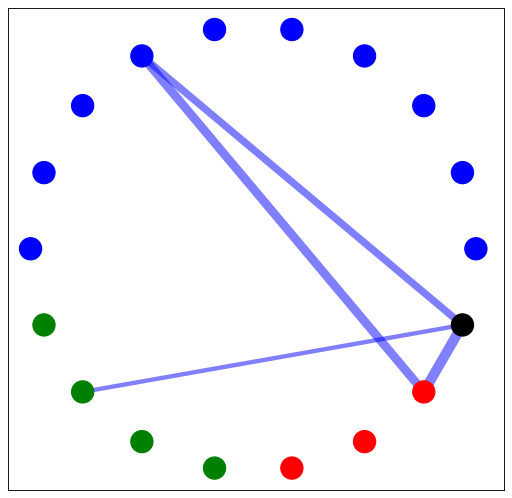

In [295]:
figure(figsize=(8, 8), dpi=80)
draw_transmat_graph_inner(b)

In [247]:
def draw_circle(G, edge_threshold=0.05, lw=50, ec='1', node_size=300):

    num_states = G.number_of_nodes()

    edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
    edgewidth = np.array(edgewidth)
    edgewidth[edgewidth>edge_threshold] = 0

    npos=nv.circos(G)

    nx.draw_networkx_edges(G, npos, alpha=0.5, width=edgewidth*lw, edge_color='b')

    nx.draw_networkx_nodes(G, npos, node_size=node_size, node_color='r',alpha=1.0)
#     ax = plt.gca()
#     ax.set_aspect('equal')

    return ax 

TypeError: 'AxesSubplot' object is not subscriptable

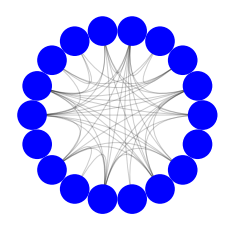

In [185]:
draw_circle(G)

TypeError: edge() missing 7 required positional arguments: 'G', 'source', 'target', 'layout_func', 'line_func', 'group_by', and 'sort_by'

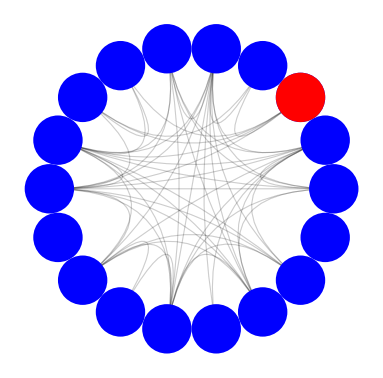

In [275]:
figure(figsize=(8, 6), dpi=80)
c = nv.circos(b)
highlights.circos_node(b, 2, color="red")
highlights.edge(lw=3)

In [276]:
help(highlights)

Help on module nxviz.highlights in nxviz:

NAME
    nxviz.highlights - Highlights onto a particular graph.

FUNCTIONS
    edge(G, source, target, layout_func, line_func, group_by, sort_by, color='red', lw=1.0, alpha=1.0, clone=False, cloned_node_layout_kwargs={}, line_func_aes_kw={'zorder': 30, 'fc': 'none'}, line_func_kwargs={})
        Highlight one particular edge.
    
    matrix_row(G: networkx.classes.graph.Graph, node: Hashable, group_by: Hashable = None, sort_by: Hashable = None, axis='x', color='red')
        Highlight one row (or column) in the matrix plot.
    
    node(G, node, layout_func, group_by, sort_by=None, color='red', radius=1, alpha=1.0, clone=False, cloned_node_layout_kwargs={})
        Highlight one particular node.

DATA
    Callable = typing.Callable
    Hashable = typing.Hashable
    arc_edge = functools.partial(<function edge at 0x7f01d59c14...ne, sort...
    arc_node = functools.partial(<function node at 0x7f01d59c14...=<functi...
    circos_edge = functool

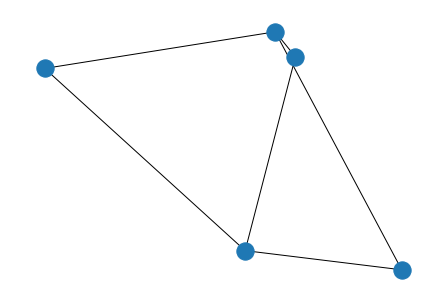

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [133]:
G = nx.from_numpy_matrix(np.matrix(A))
nx.draw(G)
plt.show()
A = nx.adjacency_matrix(G)
A

In [36]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax,rnd=False):
    arr = list(l)
    return [round((x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin,2) for x in arr]

nodelist = [n for n in G.nodes]
ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,10)
# alternative method below
# ws = rescale([float(G[u][v]['weight'])**70 for u,v in G.edges],1,50)
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]

# create new graph using nodelist and edgelist
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)
# go through nodes in graph G and store their degree as "class" in graph g
for v in G:
    g.nodes[v]["class"] = G.degree(v)

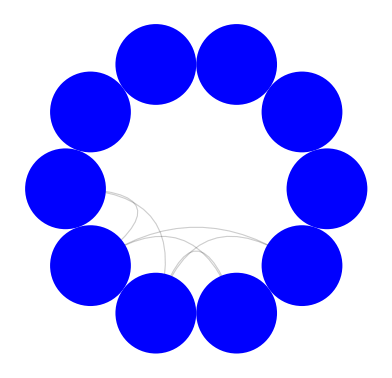

In [146]:
figure(figsize=(8, 6), dpi=80)
c = nv.circos(g)